In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
df=pd.read_csv("loan_approval.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [22]:
df.drop(columns=['loan_id'], inplace=True)


In [23]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [24]:
# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [31]:
education_cat = [' Not Graduate',' Graduate']

In [32]:
education_encoder = OrdinalEncoder(categories=[education_cat])

In [33]:
education = education_encoder.fit_transform(df[['education']])

In [34]:
df['education'] = education

In [35]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()


# Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])

# Apply label encoding to the 'loan_status' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0           1.0              0            0
1           0.0              1            1
2           1.0              0            1
3           1.0              0            1
4           0.0              1            1
...         ...            ...          ...
4264        1.0              1            1
4265        0.0              1            0
4266        0.0              0            1
4267        0.0              0            0
4268        1.0              0            0

[4269 rows x 3 columns]


In [36]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1.0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,0.0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,1.0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,1.0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,0.0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1.0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,0.0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,0.0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,0.0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [37]:
df.dtypes

no_of_dependents              int64
education                   float64
self_employed                 int32
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                   int32
dtype: object

In [38]:
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status']) 
y = df['loan_status']  

# Selecting the columns for scaling (excluding 'loan_status')
columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value', 'luxury_assets_value','bank_asset_value']

# Apply scaling to the columns
x[columns] = scaler.fit_transform(x[columns])

# Display the scaled feature variables (X) and the target variable (y)
print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())

Scaled Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102        1.0              0      1.617979     1.633052   
1         -1.473548        0.0              1     -0.341750    -0.324414   
2          0.295621        1.0              0      1.439822     1.610933   
3          0.295621        1.0              0      1.119139     1.721525   
4          1.475067        0.0              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_ass

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

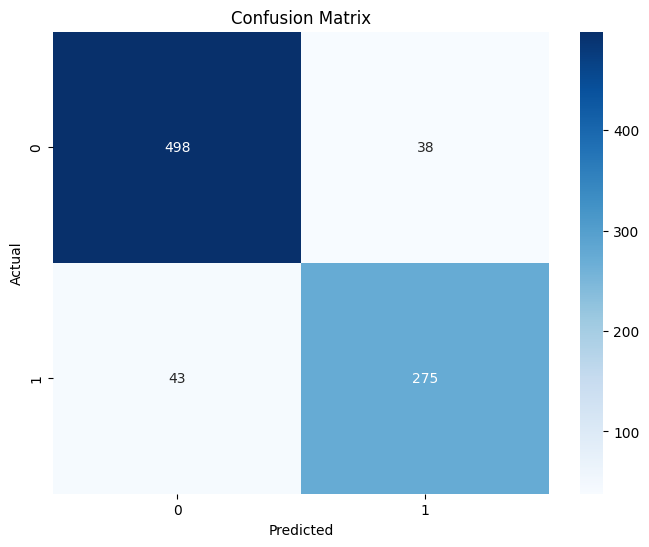

Accuracy: 0.905152224824356
Precision: 0.9049067721845864
Recall: 0.905152224824356
F1 Score: 0.9049966078550483
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [40]:
# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

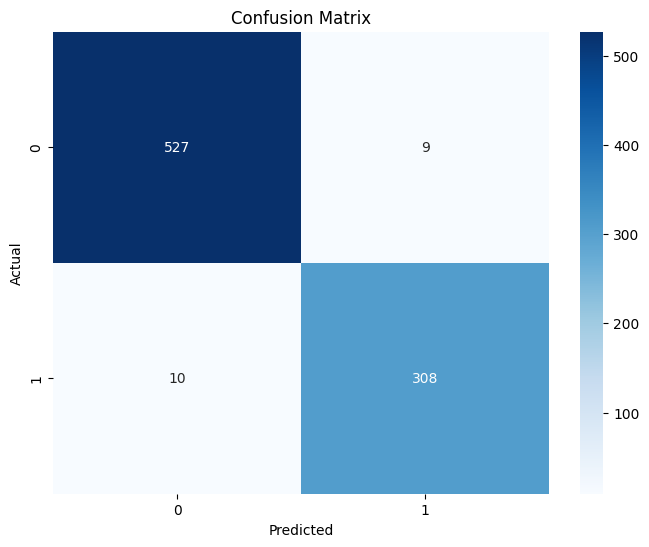

Decision Tree Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777403171039073
Recall: 0.977751756440281
F1 Score: 0.9777446054465413
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [41]:
# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [42]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Accuracy of Logistic Regression is :  90.5152224824356


In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.09484777517564402
Mean Squared Error :  0.09484777517564402
Root Mean Squared Error :  0.3079736598731197
R2 Score :  0.5941636158828498


In [44]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  97.65807962529274


In [45]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.0234192037470726
Mean Squared Error :  0.0234192037470726
Root Mean Squared Error :  0.15303334194571
R2 Score :  0.8997934854031728


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Random Forest is is :  97.65807962529274


In [47]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.0234192037470726
Mean Squared Error :  0.0234192037470726
Root Mean Squared Error :  0.15303334194571
R2 Score :  0.8997934854031728


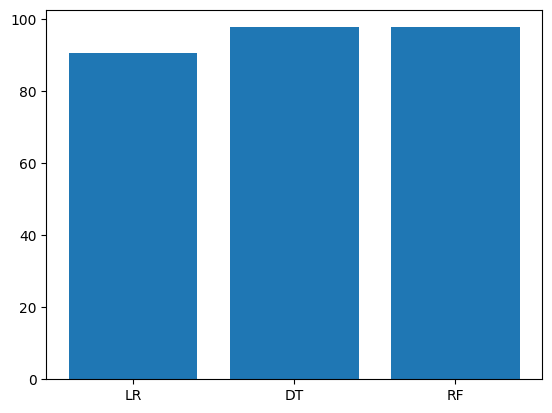

In [48]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(x_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.905152224824356
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9800936768149883
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(x_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.977751756440281
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
nn = Sequential()

# Add layers to the model
nn.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_nn = nn.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


c:\Users\Sal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8287 - loss: 0.3987 - val_accuracy: 0.9458 - val_loss: 0.1647
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - loss: 0.1968 - val_accuracy: 0.9444 - val_loss: 0.1468
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9369 - loss: 0.1676 - val_accuracy: 0.9531 - val_loss: 0.1307
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9372 - loss: 0.1577 - val_accuracy: 0.9385 - val_loss: 0.1435
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9552 - loss: 0.1291 - val_accuracy: 0.9663 - val_loss: 0.1084
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9602 - loss: 0.1129 - val_accuracy: 0.9590 - val_loss: 0.1064
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.1056 - val_accuracy: 0.9663 - val_loss: 0.0982
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.0972 - val_accuracy: 0.

In [56]:
import plotly.express as px

LR = accuracy_score(y_test, y_pred_log_reg)*100
DT = accuracy_score(y_test, y_pred_rf)*100
RF = accuracy_score(y_test, y_pred_dt)*100
NN= accuracy_score(y_test, y_pred_nn)*100
Model = ['LR','DT','RF','NN']
Score = [LR, DT, RF, NN]

fig = px.bar(x=Model, y=Score, labels={'x':'Model', 'y':'Accuracy Score (%)'}, title="Accuracy Scores of Different Models")
fig.show()


In [54]:
import pandas as pd

LR = accuracy_score(y_test, y_pred_log_reg)*100
DT = accuracy_score(y_test, y_pred_rf)*100
RF = accuracy_score(y_test, y_pred_dt)*100
NN= accuracy_score(y_test, y_pred_nn)*100

Model = ['LR','DT','RF','NN']
Score = [LR, DT, RF, NN]

results_df = pd.DataFrame({'Model': Model, 'Accuracy Score (%)': Score})
print(results_df)


  Model  Accuracy Score (%)
0    LR           90.515222
1    DT           98.009368
2    RF           97.775176
3    NN           96.487119
